<h1 align='center'> <b>Data Analysis & Stats</b> </h1>

## ***Librerias***



- <a href="https://pandas.pydata.org/"><img src="https://pandas.pydata.org/docs/_static/pandas.svg" style='height:70px'/></a>
- <a href="https://matplotlib.org/"><img src="https://matplotlib.org/stable/_static/logo2.svg" style='height:50px'/></a>

## ***Languaje***

- <a href="https://www.python.org/"><img src="https://www.python.org/static/img/python-logo.png" style='height:50px'>

## **Manejo de archivos** 

### ***Imports necesarios***

In [120]:
import pandas as pd     
import matplotlib.pyplot as plt
import numpy as np
import os 

### ***Obtengo la ruta donde se almacena el archivo CSV***

In [121]:
FOLDER_PATH = os.path.abspath('..')
EVENTS_PATH =  os.path.join(FOLDER_PATH,'src','database','events','events.csv') 
USERS_JSON_PATH = os.path.join(FOLDER_PATH,'src','database','saves','users.json')

### ***Leo el archivo y lo convierto en Data Frame***

In [122]:
if not os.path.exists(EVENTS_PATH):
    data_frame = pd.DataFrame(columns= ["timestamp","id","evento","cantidad a adivinar","usuarie","estado","texto ingresado","respuesta","nivel"])
    print('No se encontro ningun registro de partidas...')
else:   
    DATA_FRAME = pd.read_csv(EVENTS_PATH,encoding='utf-8',keep_default_na='')

### ***Informacion sobre el Data Frame***

In [123]:
DATA_FRAME.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestamp            149 non-null    float64
 1   id                   149 non-null    object 
 2   usuarie              149 non-null    object 
 3   genero               149 non-null    object 
 4   nivel                149 non-null    object 
 5   cantidad a adivinar  149 non-null    int64  
 6   evento               149 non-null    object 
 7   estado               149 non-null    object 
 8   correcta             149 non-null    object 
 9   respuesta            149 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.8+ KB


### ***Tamaño del Data Frame***

- (Filas,Columnas)

In [124]:
DATA_FRAME.shape

(149, 10)

### ***Cosas interesantes***

- Obtener los primeros, por defecto son 5

In [125]:
DATA_FRAME.head()

,timestamp,id,usuarie,genero,nivel,cantidad a adivinar,evento,estado,correcta,respuesta
0,1.655933e+09,e35797e3ba6846febc846786eabbbfcd,Lucas,man,Difícil,10,inicio_partida,,,
1,1.655933e+09,e35797e3ba6846febc846786eabbbfcd,Lucas,man,Difícil,10,intento,ok,Stefan Schimmer,Stefan Schimmer
2,1.655933e+09,e35797e3ba6846febc846786eabbbfcd,Lucas,man,Difícil,10,intento,ok,Jonathan Borja,Jonathan Borja
3,1.655933e+09,e35797e3ba6846febc846786eabbbfcd,Lucas,man,Difícil,10,intento,ok,Feiver Mercado,Feiver Mercado
4,1.655933e+09,e35797e3ba6846febc846786eabbbfcd,Lucas,man,Difícil,10,intento,error,Alexandru Albu,Eray Birniçan


- Obtener los ultimos, por defecto son 5

In [126]:
DATA_FRAME.tail()

,timestamp,id,usuarie,genero,nivel,cantidad a adivinar,evento,estado,correcta,respuesta
144,1.655944e+09,9d8f620bbcf54680a475b793d62dddec,Lucas,man,Fácil,10,intento,error,Charlie Puth,Snakehips
145,1.655944e+09,9d8f620bbcf54680a475b793d62dddec,Lucas,man,Fácil,10,intento,error,Maggie Rogers,Charlie Puth
146,1.655944e+09,9d8f620bbcf54680a475b793d62dddec,Lucas,man,Fácil,10,intento,error,Maggie Rogers,Bastille
147,1.655944e+09,9d8f620bbcf54680a475b793d62dddec,Lucas,man,Fácil,10,intento,ok,Maggie Rogers,Maggie Rogers
148,1.655944e+09,9d8f620bbcf54680a475b793d62dddec,Lucas,man,Fácil,10,fin,finalizada,,


## **Empezamos a graficar**

### Top 10 de palabras que se encuentran primero de todas las partidas. ***Hacer***

### Porcentaje de partidas por estado. ***Preguntar por los porcentajes***

In [127]:
sub_df = DATA_FRAME.loc[:,'estado']
sub_df = sub_df[lambda estado: estado != '']
estados = sub_df.value_counts()
estados

error         78
ok            53
finalizada     8
cancelada      1
Name: estado, dtype: int64

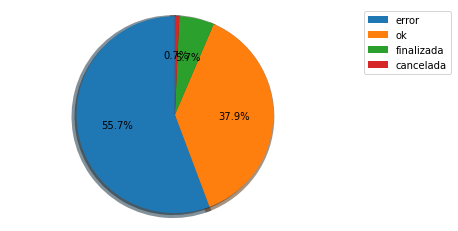

In [128]:
plt.pie(estados,
startangle = 90,
shadow = True,
wedgeprops = {'linewidth': 6},
autopct='%1.1f%%')
plt.legend(estados.index,bbox_to_anchor=(1.05,1))
plt.axis('equal')
plt.show()

### Porcentaje de partidas finalizadas según género

- ***No quedamos con los datos que nos interesan***

In [129]:
sub_df = DATA_FRAME.loc[:,["genero","estado"]]

- ***Aplicacamos title case, para no poseer invovenientes a la hora de procesar los generos.***

- ***Filtramos la información de estado para obtener las partidas finalizadas***

In [130]:
sub_df['genero'] = sub_df['genero'].apply(lambda genero: genero.title())
sub_df = sub_df[sub_df['estado']=='finalizada']

- ***Obtenos los generos y sus respectivos valores***



In [131]:
cant_x_genero = sub_df['genero'].value_counts()

- **Graficamos**
- Parametros - ***Gráfico tipo Pie***
  - startangle = Define el angulo del grafico en 90°.
  - shadow = Agrega sombra al grafico.
  - bbox_to_anchor = Posiciona fuera del grafico sus respectivas leyendas.
  - wedgeprops = Por medio de un diccionarios personalizamos el grafico.
  - autopct= Agrega el valor porcentual del los datos. 
    (**% = indica que de tipo porcentual**,
    **0.1 = indica la cantidad de decimales agregados**,
    **f = para darle formato porcentul** )

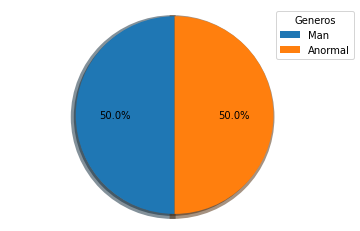

In [132]:
plt.pie(cant_x_genero.values,
startangle = 90,
shadow = True,
wedgeprops = {'linewidth': 6},
autopct='%1.1f%%')
plt.legend(cant_x_genero.index,title='Generos',bbox_to_anchor=(1.05,1))
plt.axis('equal')
plt.show()

### Porcentaje de partidas finalizadas según el nivel de dificultad

- ***No quedamos con los datos que nos interesan***

In [133]:
sub_df = DATA_FRAME.loc[:,["nivel","estado"]]

- ***Filtramos la información de estado para obtener las partidas finalizadas***

In [134]:
sub_df = sub_df[sub_df['estado'] == 'finalizada']

- ***Obtenos los niveles de dificuldad y sus respectivos valores***



In [135]:
cant_x_dificultad = sub_df['nivel'].value_counts()

- ***Gráfico tipo Pie*** - Parametros 
  - startangle = Define el angulo del grafico en 90°.
  - shadow = Agrega sombra al grafico.
  - bbox_to_anchor = Posiciona fuera del grafico sus respectivas leyendas.
  - wedgeprops = Por medio de un diccionarios personalizamos el grafico.
  - autopct= Agrega el valor porcentual del los datos. 
    (**% = indica que de tipo porcentual**,
    **0.1 = indica la cantidad de decimales agregados**,
    **f = para darle formato porcentul** )

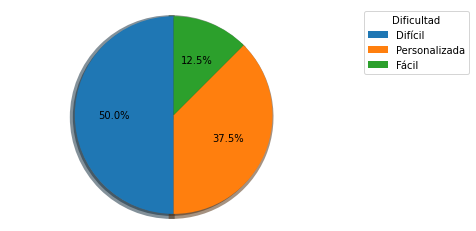

In [136]:
plt.pie(cant_x_dificultad.values,
startangle = 90,
shadow = True,
wedgeprops = {'linewidth': 6},
autopct='%1.1f%%')#
plt.legend(cant_x_dificultad.index,title='Dificultad',bbox_to_anchor=(1.05,1),)
plt.axis('equal')
plt.show()

### Duración total por partida. 

In [137]:
inicios = []
finales = []
for partida in DATA_FRAME.iloc:
    if partida['evento'] == 'inicio_partida':inicios.append(partida['timestamp'])
    elif partida['evento'] == 'fin':finales.append(partida['timestamp'])
tiempos_de_partidas = [
    round((end - start)/60, 2) 
    for start,end in zip(inicios,finales)
]
tiempos_de_partidas

[1.4, 1.43, 2.05, 1.77, 0.05, 0.16, 0.15, 0.15, 0.69]

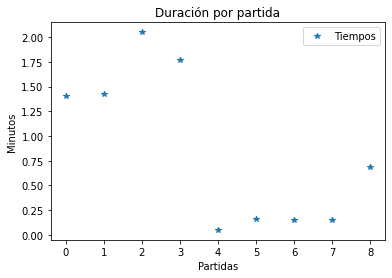

In [138]:
plt.xlabel('Partidas')
plt.ylabel('Minutos')
plt.title(f'Duración por partida')
plt.plot(tiempos_de_partidas,label='Tiempos',marker= "*" if len(tiempos_de_partidas) < 50 else ',',
linestyle='',fillstyle='top')
plt.legend()
plt.show()


### Tiempo de la respuesta exitosa más rápida.

In [139]:
sub_df = DATA_FRAME.loc[:,['timestamp','estado','correcta','respuesta']]
mejor_tiempo = 10000.0
ult_correcta = ''
inicio = 0
ult_timestamp = 0
for intento in sub_df.iloc:
    act_time = intento['timestamp']
    if (intento['correcta'] == intento['respuesta']):
        if (intento['correcta'] != ''):
            mejor_tiempo = min(mejor_tiempo, act_time - inicio)
        inicio = act_time
    elif(intento['correcta'] != ult_correcta):
        inicio = ult_timestamp
    ult_timestamp = act_time
    ult_correcta = intento['correcta']
mejor_tiempo = round(mejor_tiempo,4)
print(f'{ mejor_tiempo = } segundos')

 mejor_tiempo = 1.106 segundos


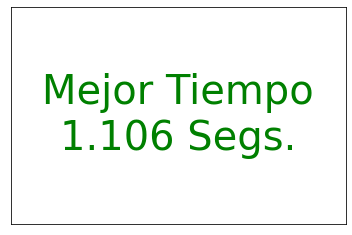

In [140]:
plt.text(0.5, 0.5, (f'Mejor Tiempo\n{mejor_tiempo} Segs.'), size=40.,
         ha="center", va="center",
         c = 'Green'
         )
plt.xticks([])
plt.yticks([])
plt.show()

### Promedio de tiempo de respuesta para respuestas exitosas.

In [141]:
sub_df = DATA_FRAME.loc[:,['timestamp','estado','correcta','respuesta']]
tiempos = []
ult_correcta = ''
inicio = 0
ult_timestamp = 0
for intento in sub_df.iloc:
    act_time = intento['timestamp']
    if (intento['correcta'] == intento['respuesta']):
        if (intento['correcta'] != ''):
            tiempos.append(act_time - inicio) 
        inicio = act_time
    elif(intento['correcta'] != ult_correcta):
        inicio = ult_timestamp
    ult_timestamp = act_time
    ult_correcta = intento['correcta']
tiempo_promedio = round(sum(tiempos)/len(tiempos),2)
print(f'{tiempo_promedio = } Segundos')

tiempo_promedio = 8.38 Segundos


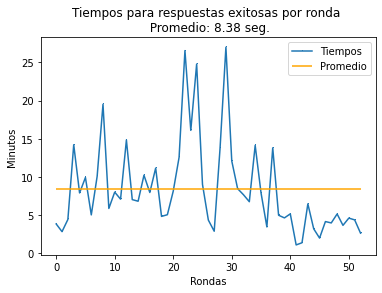

In [142]:
plt.plot(tiempos,label='Tiempos',marker= '.' if len(tiempos) < 50 else ',')
plt.hlines(tiempo_promedio,0,(len(tiempos)-1),label="Promedio",colors='orange')
plt.title(f'Tiempos para respuestas exitosas por ronda \n Promedio: {tiempo_promedio} seg.')
plt.xlabel('Rondas')
plt.ylabel('Minutos')
plt.legend()
plt.show()

### Promedio de tiempo de partida general.

In [143]:
inicios = []
finales = []
for partida in DATA_FRAME.iloc:
    if partida['evento'] == 'inicio_partida':inicios.append(partida['timestamp'])
    elif partida['evento'] == 'fin':finales.append(partida['timestamp'])
tiempos_de_partidas = [
    round((end - start)/60, 2) 
    for start,end in zip(inicios,finales)
]
promedio = round((sum(tiempos_de_partidas)/ len(tiempos_de_partidas)),2)
print(f'{promedio} minutos es el tiempo promedio que dura una partida')

0.87 minutos es el tiempo promedio que dura una partida


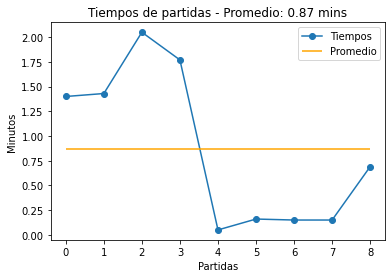

In [144]:
plt.xlabel('Partidas')
plt.ylabel('Minutos')
plt.title(f'Tiempos de partidas - Promedio: {promedio} mins')
plt.plot(tiempos_de_partidas,label='Tiempos',marker= 'o' if len(tiempos_de_partidas) < 50 else ',')
plt.hlines(promedio,0,(len(tiempos_de_partidas)-1),label="Promedio",colors='orange')
plt.legend()
plt.show()

### Porcentaje de aciertos por usuarie.

In [145]:
sub_df = DATA_FRAME.loc[:,['usuarie','estado']]
sub_df = sub_df[(sub_df['estado'] == 'error') | (sub_df['estado'] == 'ok')]
intentos_x_usuarie = sub_df.value_counts()
intentos_x_usuarie = {
    usuarie: tuple(intentos_x_usuarie[usuarie,estado]
    for estado in sub_df['estado'].unique()) 
    for usuarie in sub_df['usuarie'].unique()
}
print(f"Errores y Aciertos por Usuarie - {intentos_x_usuarie}")

Errores y Aciertos por Usuarie - {'Lucas': (37, 51), 'pepe': (16, 27)}


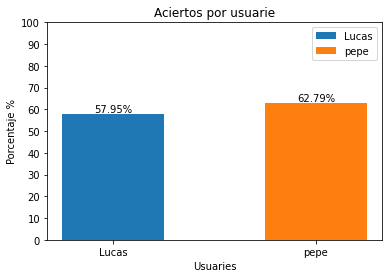

In [146]:
for usuarie,intentos in intentos_x_usuarie.items():
    plt.bar_label(plt.bar(usuarie,(intentos[1]/sum(intentos)*100),width=0.5,label=usuarie,),[str(round(intentos[1]/sum(intentos)*100,2)) + '%'])
plt.title('Aciertos por usuarie')
plt.legend()
plt.xlabel('Usuaries')
plt.ylabel('Porcentaje %')
plt.yticks([x for x in range(101) if x % 10 == 0])    
plt.show()

### Cantidad de tarjetas para las que el usuarie no dió respuesta (timeout).

In [147]:
sub_df = DATA_FRAME.loc[:,['estado','usuarie']]
sub_df = sub_df[sub_df['estado'] == 'timeout']
timeout_por_usuarie = {
    usuarie:sub_df[sub_df['usuarie'] == usuarie]  
    for usuarie in sub_df['usuarie'].unique() 
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


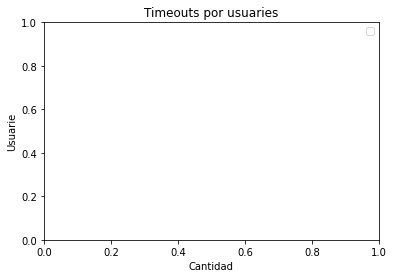

In [148]:
plt.title('Timeouts por usuaries')
plt.ylabel('Usuarie')
plt.xlabel('Cantidad')
for usuario,df in timeout_por_usuarie.items():
    plt.bar_label(plt.barh(usuario,len(df.index),height=0.5,label=f"{usuario}"),[len(df.index)])
plt.legend()
plt.show()

### Cantidad de tarjetas en las que el usuarie dió una respuesta errónea

- Obtenenos los estados para cada uno de los usuarios

In [149]:
sub_df = DATA_FRAME.loc[:,['id','estado','usuarie','correcta']]
sub_df = sub_df[sub_df['estado'] == 'error']
errores_x_usuarie = {
    usuarie:sub_df[sub_df['usuarie'] == usuarie] 
    for usuarie in sub_df['usuarie'].unique()
}
errores_x_usuarie = (
    (usuarie,len(df.value_counts())) 
    for usuarie,df in errores_x_usuarie.items()
)
errores_x_usuarie

<generator object <genexpr> at 0x000001C2B2983ED0>

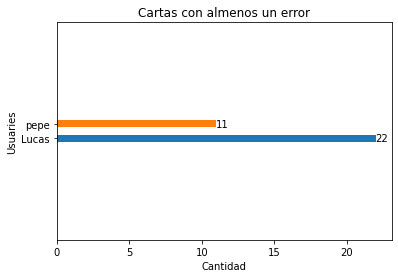

In [150]:
plt.title('Cartas con almenos un error')
plt.xlabel('Cantidad')
plt.ylabel('Usuaries')
for usuarie,cant in errores_x_usuarie :
    plt.bar_label(plt.barh(usuarie,cant,height=0.5,label=f"{usuarie}"),[cant])
plt.axis('equal')
plt.show()

## ***Opcional***

### Gráfico que muestre el porcentaje de partidas que se juegan para cada día de la semana. ***Hacer***

### Promedio de tiempo de partidas finalizadas por nivel. ***Hacer***

### Porcentaje de palabras encontradas en las partidas “timeout, es decir que finalizaron por falta de tiempo para completar. ***Hacer***